# Chapter 3 - Shallow Neural Networks

## Solutions to Chapter End Problems

### Problem 3.1 
What kind of mapping from input to output would be created if the activation function in equation 3.1 was linear so that $a[z] = ψ_0 + ψ_1 z$? What kind of mapping would be created if the activation function was removed, so $a[z] = z$?

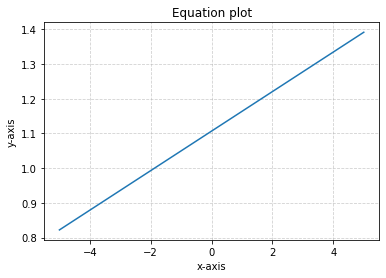

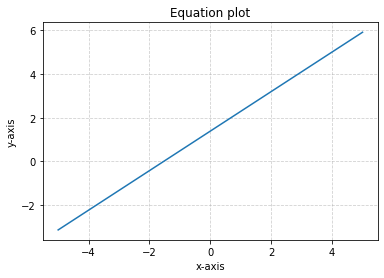

In the both the scenarios the mapping between input and output is entirely linear.


In [2]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import random

def input_function_1(x):
    phi_0 = random.random(); phi_1 = random.random()
    phi_2 = random.random(); phi_3 = random.random()
    omega_0 = random.random(); omega_1 = random.random()
    theta_10 = random.random(); theta_11 = random.random()
    theta_20 = random.random(); theta_21 = random.random()
    theta_30 = random.random(); theta_31 = random.random()
    
    h_1 = omega_0 + omega_1 * (theta_10 + theta_11 * x)
    h_2 = omega_0 + omega_1 * (theta_20 + theta_21 * x)
    h_3 = omega_0 + omega_1 * (theta_30 + theta_31 * x)
    
    return phi_0 + phi_1*h_1 + phi_2*h_2 + phi_3*h_3

def input_function_2(x):
    phi_0 = random.random(); phi_1 = random.random()
    phi_2 = random.random(); phi_3 = random.random()
    omega_0 = random.random(); omega_1 = random.random()
    theta_10 = random.random(); theta_11 = random.random()
    theta_20 = random.random(); theta_21 = random.random()
    theta_30 = random.random(); theta_31 = random.random()
    
    h_1 = theta_10 + theta_11 * x
    h_2 = theta_20 + theta_21 * x
    h_3 = theta_30 + theta_31 * x
    
    return phi_0 + phi_1*h_1 + phi_2*h_2 + phi_3*h_3

def plot_function(x,y):
    fig = plt.figure(figsize = (6, 4))
    plt.plot(x, y)  # Create the plot
    plt.title('Equation plot')  # Add a title
    plt.xlabel('x-axis')  # Add X and y Label
    plt.ylabel('y-axis')
    plt.grid(alpha =.6, linestyle ='--')  # Add a grid
    plt.show()  # Show the plot

# Creating vectors X and Y
x = np.linspace(-5, 5, 50)

y = input_function_1(x)
plot_function(x,y)

y = input_function_2(x)
plot_function(x,y)

print("In the both the scenarios the mapping between input and output is entirely linear.")

### Problem 3.2
For each of the four linear regions in figure 3.3j, indicate which hidden units are inactive and which are active (i.e., which do and do not clip their inputs).

<figure>
    <img src="assets/fig_3_3_d_e_f.png" width="600" >
    <figcaption>Figure 3.3 d-f</figcaption>
</figure>

<figure>
    <img src="assets/fig_3_3_j.png" width="300" >
    <figcaption>Figure 3.3 j</figcaption>
</figure>

---

Linear region 1: From figure 3.3 d-f it is observed that from the three activations, only $h_3$ is active and, $h_1$ and $h_2$ are inactive.

Linear region 2: Similarily, $h_1$ and $h_3$ are active and, $h_2$ is inactive.

Linear region 3: Similarily, $h_1$, $h_2$ and $h_3$ are all active.

Linear region 4: Similarily, $h_1$ and $h_2$ are active and, $h_3$ is inactive.

### Problem 3.3
Derive expressions for the positions of the “joints” in function in figure 3.3j in terms of the ten parameters $\phi$ and the input $x$. Derive expressions for the slopes of the four linear regions.

Position of joints are $\frac{-\theta_{10}}{\theta_{11}}$, $\frac{-\theta_{20}}{\theta_{21}}$ and $\frac{-\theta_{30}}{\theta_{31}}$.

Slopes of four regions are: $\phi_3\theta_{31}$, $\phi_1\theta_{11}+\phi_3\theta_3$, $\phi_1\theta_{11}+\phi_2\theta_{21}+\phi_3\theta_{31}$ and $\phi_1\theta_{11}+\phi_2\theta_{21}$.

### Problem 3.4

Draw a version of figure 3.3 where the y-intercept and slope of the third hidden unit have changed as in figure 3.14c. Assume that the remaining parameters remain the same.

![](assets/fig_prob_3_4.png)

### Problem 3.5
Prove that the following property holds for $\alpha \in R^+$ :
$$ReLU[\alpha.z]=\alpha.ReLU[z].$$
This is known as the *non-negative homogeneity* property of the ReLU function.

Let us say, $x = \alpha.z$

We know that,
$$
ReLU[x]= 
\begin{cases}\label{eq:relu} \tag{1}
    x,&x\geq 0\\
    0,& x<0
\end{cases}
$$
Put $x = \alpha.z$ in $\eqref{eq:relu}$ first case.
$$ 
= x, \ x\geq 0\\
= \alpha.z, \ \alpha.z\geq 0
$$
Here, $\alpha$ must be a positive real number for the inequality to remain true, otherwise it will flip the sign. 

### Problem 3.6
Following on from problem 3.5, what happens to the shallow network defined in equations 3.3 and 3.4 when we multiply the parameters $\theta_{10}$ and $\theta_{11}$ by a positive constant $\alpha$ and divide the slope $\phi_1$ by the same parameter $\alpha$? What happens if $\alpha$ is negative?

**Case I** - Positive constant $\alpha$
$$y=\phi_0+\phi_1h_1+\phi_2h_2+\phi_3h_3$$
$$h_1=a[\theta_{10}+\theta_{11}x]$$
Multiplying $\theta_{10}$ and $\theta_{11}$ by a positive constant $\alpha$.
$$h'_1=a[\alpha\theta_{10}+\alpha\theta_{11}x]$$
$$h'_1=a[\alpha(\theta_{10}+\theta_{11}x)]$$
From Problem 3.5, since $\alpha$ is a positive constant, and activation is ReLU,
$$h'_1=\alpha(a[\theta_{10}+\theta_{11}x])$$
$$h'_1=\alpha h_1$$
$$y'=\phi_0+\phi_1h'_1+\phi_2h_2+\phi_3h_3$$
$$y'=\phi_0+\phi_1\alpha h_1+\phi_2h_2+\phi_3h_3$$
Dividing, $\phi_1$ by a positive constant $\alpha$.
$$y'=\phi_0+\frac{\phi_1}{\alpha}\alpha h_1+\phi_2h_2+\phi_3h_3$$
Positive constant $\alpha$ cancels out.
$$y'=\phi_0+\phi_1h_1+\phi_2h_2+\phi_3h_3$$
$$y'=y$$
No change to the network.

**Case II** - Negative constant $\alpha$
$$y=\phi_0+\phi_1h_1+\phi_2h_2+\phi_3h_3$$
$$h_1=a[\theta_{10}+\theta_{11}x]$$
Multiplying $\theta_{10}$ and $\theta_{11}$ by a negative constant $\alpha$.
$$h'_1=a[\alpha\theta_{10}+\alpha\theta_{11}x]$$
$$h'_1=a[\alpha(\theta_{10}+\theta_{11}x)]$$
From Problem 3.5, since $\alpha$ is a negative constant, and activation is ReLU,
$$h'_1\neq \alpha(a[\theta_{10}+\theta_{11}x])$$
$$y'=\phi_0+\phi_1a[\alpha(\theta_{10}+\theta_{11}x)]+\phi_2h_2+\phi_3h_3$$
Dividing, $\phi_1$ by a positive constant $\alpha$.
$$y'=\phi_0+\frac{\phi_1}{\alpha}a[\alpha(\theta_{10}+\theta_{11}x)])+\phi_2h_2+\phi_3h_3$$
Network changes.

---
Network with no alpha.
![](assets/fig_3_6_1.png)
Network with positive constant alpha.
![](assets/fig_3_6_1.png)
Network with negative constant alpha.
![](assets/fig_3_6_2.png)

### Problem 3.7
Consider fitting the model in equation 3.1 using a least squares loss function. Does this loss function have a unique minimum? i.e., is there a single “best” set of parameters?


### Problem 3.8
Consider replacing the ReLU activation function with (i) the Heaviside step function heaviside[z], (ii) the hyperbolic tangent function tanh[z], and (iii) the rectangular function rect[z]. Redraw a version of figure 3.3 for each of these functions. The original parameters were: $\phi = \{ \phi_0 , \phi_1 , \phi_2 , \phi_3 , \theta_{10} , \theta_{11} , \theta_{20} , \theta_{21} , \theta_{30} , \theta_{31} \} = \{−0.23, −1.3, 1.3, 0.66, −0.2, 0.4, −0.9, 0.9, 1.1, −0.7 \}$. Provide an informal description of the family of functions that can be created by neural networks with one input, three hidden units, and one output for each activation function.

----- With relu activation function -----


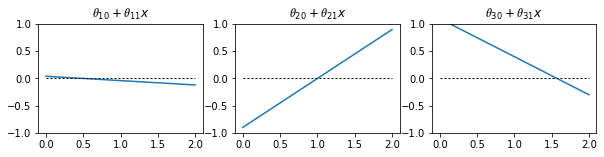

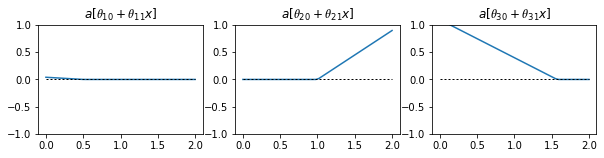

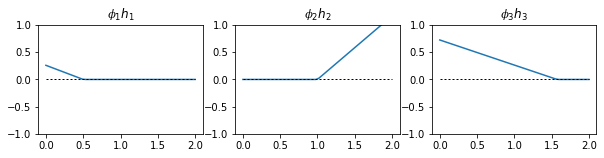

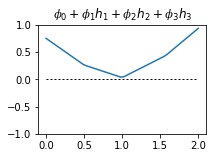

In [10]:
def equation_line(x, theta_1, theta_2):
    return theta_1 + theta_2 * x

def rect_activation(z):
    return np.array([1 if val >= 0 and val <= 1 else 0 for val in z])

def apply_activation(input_value, activation):
    if activation == 'heaviside':
        return np.heaviside(input_value,1)
    elif activation == 'tanh':
        return np.tanh(input_value)
    elif activation == 'relu':
        return np.maximum(0,input_value)
    elif activation == 'rect':
        return rect_activation(input_value)

def equation_plot(activation):
    print("----- With", activation, "activation function -----")
    alpha = -0.2
    phi_0 = -0.23; phi_1 = -1.3/alpha
    phi_2 = 1.3; phi_3 = 0.66
    theta_10 = -0.2*alpha; theta_11 = 0.4*alpha
    theta_20 = -0.9; theta_21 = 0.9
    theta_30 = 1.1; theta_31 = -0.7
    
    # Creating vectors X and Y
    x = np.linspace(0, 2, 50)
    
    l_1 = equation_line(x, theta_10, theta_11)
    l_2 = equation_line(x, theta_20, theta_21)
    l_3 = equation_line(x, theta_30, theta_31)

    fig, ax = plt.subplots(1, 3, figsize = (10, 2))# plot at row 0, column 0
    y = l_1; ax[0].plot(x, y); ax[0].set_title("$𝜃_{10} + 𝜃_{11}x$"); ax[0].plot(x, [0] * len(y), 'k-', lw=1,dashes=[2, 2]); ax[0].set_ylim([-1, 1])
    y = l_2; ax[1].plot(x, y); ax[1].set_title("$𝜃_{20} + 𝜃_{21}x$"); ax[1].plot(x, [0] * len(y), 'k-', lw=1,dashes=[2, 2]); ax[1].set_ylim([-1, 1])
    y = l_3; ax[2].plot(x, y); ax[2].set_title("$𝜃_{30} + 𝜃_{31}x$"); ax[2].plot(x, [0] * len(y), 'k-', lw=1,dashes=[2, 2]); ax[2].set_ylim([-1, 1])
    plt.show()
    
    # Apply activation
    h_1 = apply_activation(l_1, activation)
    h_2 = apply_activation(l_2, activation)
    h_3 = apply_activation(l_3, activation)
    
    fig, ax = plt.subplots(1, 3, figsize = (10, 2))# plot at row 0, column 0
    y = h_1; ax[0].plot(x, y); ax[0].set_title("$a[𝜃_{10} + 𝜃_{11}x]$"); ax[0].plot(x, [0] * len(y), 'k-', lw=1,dashes=[2, 2]); ax[0].set_ylim([-1, 1])
    y = h_2; ax[1].plot(x, y); ax[1].set_title("$a[𝜃_{20} + 𝜃_{21}x]$"); ax[1].plot(x, [0] * len(y), 'k-', lw=1,dashes=[2, 2]); ax[1].set_ylim([-1, 1])
    y = h_3; ax[2].plot(x, y); ax[2].set_title("$a[𝜃_{30} + 𝜃_{31}x]$"); ax[2].plot(x, [0] * len(y), 'k-', lw=1,dashes=[2, 2]); ax[2].set_ylim([-1, 1])
    plt.show()
    
    fig, ax = plt.subplots(1, 3, figsize = (10, 2))# plot at row 0, column 0
    y = phi_1*h_1; ax[0].plot(x, y); ax[0].set_title("$𝜙_1h_1$"); ax[0].plot(x, [0] * len(y), 'k-', lw=1,dashes=[2, 2]); ax[0].set_ylim([-1, 1])
    y = phi_2*h_2; ax[1].plot(x, y); ax[1].set_title("$𝜙_2h_2$"); ax[1].plot(x, [0] * len(y), 'k-', lw=1,dashes=[2, 2]); ax[1].set_ylim([-1, 1])
    y = phi_3*h_3; ax[2].plot(x, y); ax[2].set_title("$𝜙_3h_3$"); ax[2].plot(x, [0] * len(y), 'k-', lw=1,dashes=[2, 2]); ax[2].set_ylim([-1, 1])
    plt.show()
    
    y = phi_0 + phi_1*h_1 + phi_2*h_2 + phi_3*h_3; 
    plt.figure(figsize = (3, 2))
    plt.plot(x, y); plt.title("$𝜙_0+𝜙_1h_1+𝜙_2h_2+𝜙_3h_3$"); plt.plot(x, [0] * len(y), 'k-', lw=1,dashes=[2, 2]); plt.ylim([-1, 1])
    plt.show()
    
# equation_plot('heaviside')
# equation_plot('tanh')
# equation_plot('rect')
equation_plot('relu')

### Problem 3.9
Show that the third linear region in figure 3.3 has a slope that is the sum of the slopes of the first and fourth linear regions.

From **Problem 3.3**, 

Slopes of region 1: $$\phi_3\theta_{31}$$ 
Slopes of region 3: $$\phi_1\theta_{11}+\phi_2\theta_{21}+\phi_3\theta_{31}$$
Slopes of region 4: $$\phi_1\theta_{11}+\phi_2\theta_{21}$$

Adding slopes of region 1 and 4 we get: $$\phi_3\theta_{31} + \phi_1\theta_{11}+\phi_2\theta_{21} = \phi_1\theta_{11}+\phi_2\theta_{21}+\phi_3\theta_{31}$$
Thus the above equation is equal to slope of region 3.

### Problem 3.10
Consider a neural network with one input, one output, and three hidden units. The construction in figure 3.3 shows how this creates four linear regions. Under what circumstances could this network produce a function with fewer than four linear regions?

i- equating the slopes of any linear regions.

ii- changing any preactivation's y-intercept to make it negative in a region, therefore inactive.

iii- making any of the line's slope equal to zero.

### Problem 3.11
How many parameters does the model in figure 3.6 have?

For each activation $2 \theta$s, total $4*2=8 \theta$s.
For each output $5 \phi$s, total $2*5=10 \phi$s.
Total 10+8=18 parameters.

### Problem 3.12
How many parameters does the model in figure 3.7 have?

For each activation $3 \theta$s, total $3*3=9 \theta$s.
For each output $4 \phi$s, total $1*4=4 \phi$s.
Total 9+4=13 parameters.

### Problem 3.13
What is the activation pattern for each of the seven regions in figure 3.8? In other words, which hidden units are active (pass the input) and which are inactive (clip the input) for each region?

![](assets/fig_3_8.png)